# HW1 - Pandas

## 0. Загрузка библиотек и данных

In [54]:
import pandas as pd
import seaborn as sns

При попытке прочесть файл, используя url, Pandas валится с ошибкой.

In [55]:
cardio = pd.read_csv('https://files.slack.com/files-pri/T0SB2EY1Z-FV5LQAF54/download/cardio_train.csv', sep = ';')

ParserError: Error tokenizing data. C error: Expected 8 fields in line 282, saw 58


Потому скачаем данные.

In [56]:
cardio = pd.read_csv('~/Downloads/cardio_train.csv', sep = ';')

## 1. Определение количества мужчин и женщин

Однозначной кодировки у нас нет. Хм. Как же быть. 
Зато у нас есть другие переменные. И данные о росте, например. Попробуем посмотреть средний рост женщин в Европе. Это около 169 см. Таким образом, примем за неимением иного, что женщины - это люди с ростом 169 см или меньше.

In [5]:
cardio.loc[(cardio['height'] > 169) & (cardio['gender'] == 2), 'gender'] = 'm'
cardio.loc[(cardio['height'] <= 169) & (cardio['gender'] == 1), 'gender'] = 'f'

Примем для оставшихся значений следующее правило: 1 - женщина (f), 2 - мужчина (m).

In [6]:
cardio.loc[cardio['gender'] == 2, 'gender'] = 'm'
cardio.loc[cardio['gender'] == 1, 'gender'] = 'f'

In [7]:
cardio['gender'].value_counts()

f    45530
m    24470
Name: gender, dtype: int64

In [8]:
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,m,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,f,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,f,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,m,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,f,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,m,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,f,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,m,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,f,163,72.0,135,80,1,2,0,0,0,1


## 2. Новый признак --- BMI 

Создадим новый признак, BMI, используя следующую формулу:
$$ BMI = \left( \frac{m}{h^2} \right)$$
    , где m - масса тела, h - высота. Кроме того, переведем рост в метры.

In [9]:
cardio['BMI'] = cardio['weight']/(cardio['height']/100)**2
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,m,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,f,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,f,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,m,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,f,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,m,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,f,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,m,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,f,163,72.0,135,80,1,2,0,0,0,1,27.099251


## 3. Визуализация распределения переменной BMI

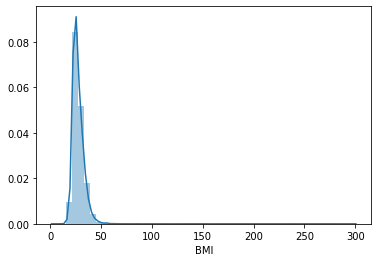

In [10]:
sns.distplot(cardio['BMI'])

Судя по построенному графику, выбросы ОПРЕДЕЛЕННО есть. Это подтверждается описательной статистикой по переменной BMI. Гляньте только на максимальное значение переменной!

In [11]:
cardio['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

## 4. Новый датафрейм без пациентов, у которых диастолическое давление выше систолического

In [16]:
cardio_norm_ap = cardio[cardio.ap_hi >= cardio.ap_lo]

## 5. Визуализизация распределения уровня холестерина для различных возрастных категорий

Создадим переменную age_year, в которой переведём возраст в днях в возраст в годах. Примем, что у нас нет високосных годов и поделим количество дней на 365 и округлим до целого числа.

In [22]:
cardio['age_year'] = (cardio['age']/365).round()
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year
0,0,18393,m,168,62.0,110,80,1,1,0,0,1,0,21.967120,50.0
1,1,20228,f,156,85.0,140,90,3,1,0,0,1,1,34.927679,55.0
2,2,18857,f,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.0
3,3,17623,m,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.0
4,4,17474,f,156,56.0,100,60,1,1,0,0,0,0,23.011177,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,m,168,76.0,120,80,1,1,1,0,1,0,26.927438,53.0
69996,99995,22601,f,158,126.0,140,90,2,2,0,0,1,1,50.472681,62.0
69997,99996,19066,m,183,105.0,180,90,3,1,0,1,0,1,31.353579,52.0
69998,99998,22431,f,163,72.0,135,80,1,2,0,0,0,1,27.099251,61.0


Примем возрастные категории по https://www.ethnicity-facts-figures.service.gov.uk/uk-population-by-ethnicity/demographics/age-groups/latest

In [29]:
cardio.loc[cardio['age_year'] <= 4, 'age_category'] = '0-4'
cardio.loc[(cardio['age_year'] >= 5) & (cardio['age_year'] <= 9) , 'age_category'] = '5-9'
cardio.loc[(cardio['age_year'] >= 10) & (cardio['age_year'] <= 14) , 'age_category'] = '10-14'
cardio.loc[(cardio['age_year'] >= 15) & (cardio['age_year'] <= 17) , 'age_category'] = '15-17'
cardio.loc[(cardio['age_year'] >= 18) & (cardio['age_year'] <= 24) , 'age_category'] = '18-24'
cardio.loc[(cardio['age_year'] >= 25) & (cardio['age_year'] <= 29) , 'age_category'] = '25-29'
cardio.loc[(cardio['age_year'] >= 30) & (cardio['age_year'] <= 34) , 'age_category'] = '30-34'
cardio.loc[(cardio['age_year'] >= 35) & (cardio['age_year'] <= 39) , 'age_category'] = '35-39'
cardio.loc[(cardio['age_year'] >= 40) & (cardio['age_year'] <= 44) , 'age_category'] = '40-44'
cardio.loc[(cardio['age_year'] >= 45) & (cardio['age_year'] <= 49) , 'age_category'] = '45-49'
cardio.loc[(cardio['age_year'] >= 50) & (cardio['age_year'] <= 54) , 'age_category'] = '50-54'
cardio.loc[(cardio['age_year'] >= 55) & (cardio['age_year'] <= 59) , 'age_category'] = '55-59'
cardio.loc[(cardio['age_year'] >= 60) & (cardio['age_year'] <= 64) , 'age_category'] = '60-64'
cardio.loc[(cardio['age_year'] >= 65) & (cardio['age_year'] <= 69) , 'age_category'] = '65-69'
cardio.loc[(cardio['age_year'] >= 70) & (cardio['age_year'] <= 74) , 'age_category'] = '70-74'
cardio.loc[(cardio['age_year'] >= 75) & (cardio['age_year'] <= 79) , 'age_category'] = '75-79'
cardio.loc[(cardio['age_year'] >= 80) & (cardio['age_year'] <= 84) , 'age_category'] = '80-84'
cardio.loc[(cardio['age_year'] >= 85) , 'age_category'] = '85+'

/home/stephen/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


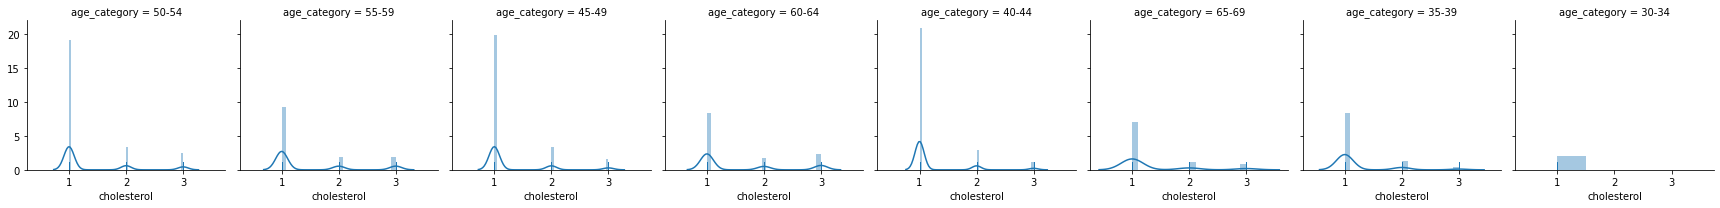

In [48]:
facet = sns.FacetGrid(cardio, col='age_category')
facet = (facet.map(sns.distplot, "cholesterol", rug=True))

## 6. Как соотносятся ИМТ и наличие ССЗ? 

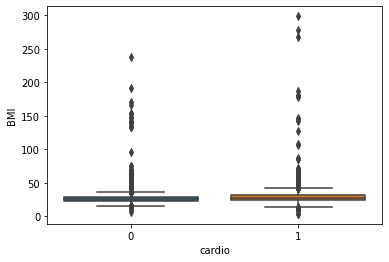

In [49]:
sns.boxplot(x="cardio", y="BMI", data=cardio)

Из-за наличия выбросов довольно сложно судить о сотношении.